<a href="https://colab.research.google.com/github/May-Xiaoting-Zhou/MX-Project/blob/main/EEG_Signals_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# prompt: make dir /content/drive/MyDrive/MX_Project_Data/Subject_1 to /content/drive/MyDrive/MX_Project_Data/Subject_38

import os
for i in range(1,39):
    !mkdir /content/drive/MyDrive/MX_Project_Data/Subject_{i}


In [ ]:
# prompt: unzip /content/drive/MyDrive/MX_Project_Data/Subject_18.zip
# for i in range(9,10):
# !unzip /content/drive/MyDrive/MX_Project_Data/Subject_9.zip

!unrar x /content/OpenBCISession_Subject_9_Baseline.rar /content/drive/MyDrive/MX_Project_Data/Subject_9
!unrar x /content/OpenBCISession_Subject_9_Exam.rar /content/drive/MyDrive/MX_Project_Data/Subject_9
!unrar x /content/OpenBCISession_Subject_9_Training.rar /content/drive/MyDrive/MX_Project_Data/Subject_9

In [ ]:
# prompt: unrar /content/OpenBCISession_Subject_18_Baseline.rar to save to /content/drive/MyDrive/MX_Project_Data/Subject_18
for i in range(9,10):
  !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Baseline.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}
  !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Training.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}
  !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Exam.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}


In [ ]:
# prompt: rename file name baseline to Baseline, training to Training and exam to Exam

import os

# Loop through each subject folder
for subject_folder in os.listdir("/content/drive/MyDrive/MX_Project_Data"):
  # Check if the folder name starts with "Subject_"
  if subject_folder.startswith("Subject_"):
    # Get the subject number
    subject_number = subject_folder.split("_")[1]

    # Build the path to the subject folder
    subject_path = os.path.join("/content/drive/MyDrive/MX_Project_Data", subject_folder)

    # Loop through each file in the subject folder
    for filename in os.listdir(subject_path):
      # Check if the file name contains "baseline", "training", or "exam"
      if "baseline" in filename.lower():
        # Rename the file to "Baseline"
        new_filename = "Baseline"
      elif "training" in filename.lower():
        # Rename the file to "Training"
        new_filename = "Training"
      elif "exam" in filename.lower():
        # Rename the file to "Exam"
        new_filename = "Exam"
      else:
        # Skip the file if it doesn't match any of the criteria
        continue

      # Build the old and new file paths
      old_file_path = os.path.join(subject_path, filename)
      new_file_path = os.path.join(subject_path, new_filename)

      # Rename the file
      os.rename(old_file_path, new_file_path)



In [ ]:
# # prompt: catch FileNotFoundError

# import os

# for i in range(1,39):
#     try:
#         os.mkdir(f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}')
#     except FileNotFoundError:
#         pass

# for i in range(1,39):
#   try:
#     !unzip /content/drive/MyDrive/MX_Project_Data/Subject_{i}.zip
#   except FileNotFoundError:
#     pass

for i in range(1,39):
  try:
    !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Baseline.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}
  except FileNotFoundError:
    pass
  try:
    !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Training.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}
  except FileNotFoundError:
    pass
  try:
    !unrar x /content/drive/MyDrive/MX_Project_Data/OpenBCISession_Subject_{i}_Exam.rar /content/drive/MyDrive/MX_Project_Data/Subject_{i}
  except FileNotFoundError:
    pass


In [ ]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
def read_txt_files(path):
  """
  Reads all txt files under a given path.

  Args:
    path: The path to the directory containing the txt files.

  Returns:
    A list of strings, where each string is the content of a txt file.
  """

  txt_files = []
  for filename in os.listdir(path):
    if filename.endswith('.txt'):
        txt_files.append(os.path.join(path, filename))

  return txt_files
for name in ['Baseline', 'Exam', 'Training']:
  for i in range(1, 39):
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      txt_files = read_txt_files(path)
      # Print the content of each txt file
      for filename in txt_files:
        # Read data from line 5
        data = pd.read_table(filename, skiprows=4, sep=',', header=None)
        new_filename = filename[:-4] + '.csv'
        data.to_csv(new_filename)
    except FileNotFoundError:
      pass


<ipython-input-10-6a463296de9c>:30: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_table(filename, skiprows=4, sep=',', header=None)


In [ ]:
# prompt: read /content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Baseline/OpenBCI-RAW-2024-03-19_16-14-33.csv to dataframe

import pandas as pd
df_bl = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_1/Baseline/OpenBCI-RAW-2024-05-06_14-54-56.csv')
df_ex = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_1/Exam/OpenBCI-RAW-2024-05-07_18-52-49.csv')
df_tr = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_1/Training/OpenBCI-RAW-2024-05-06_15-02-38.csv')


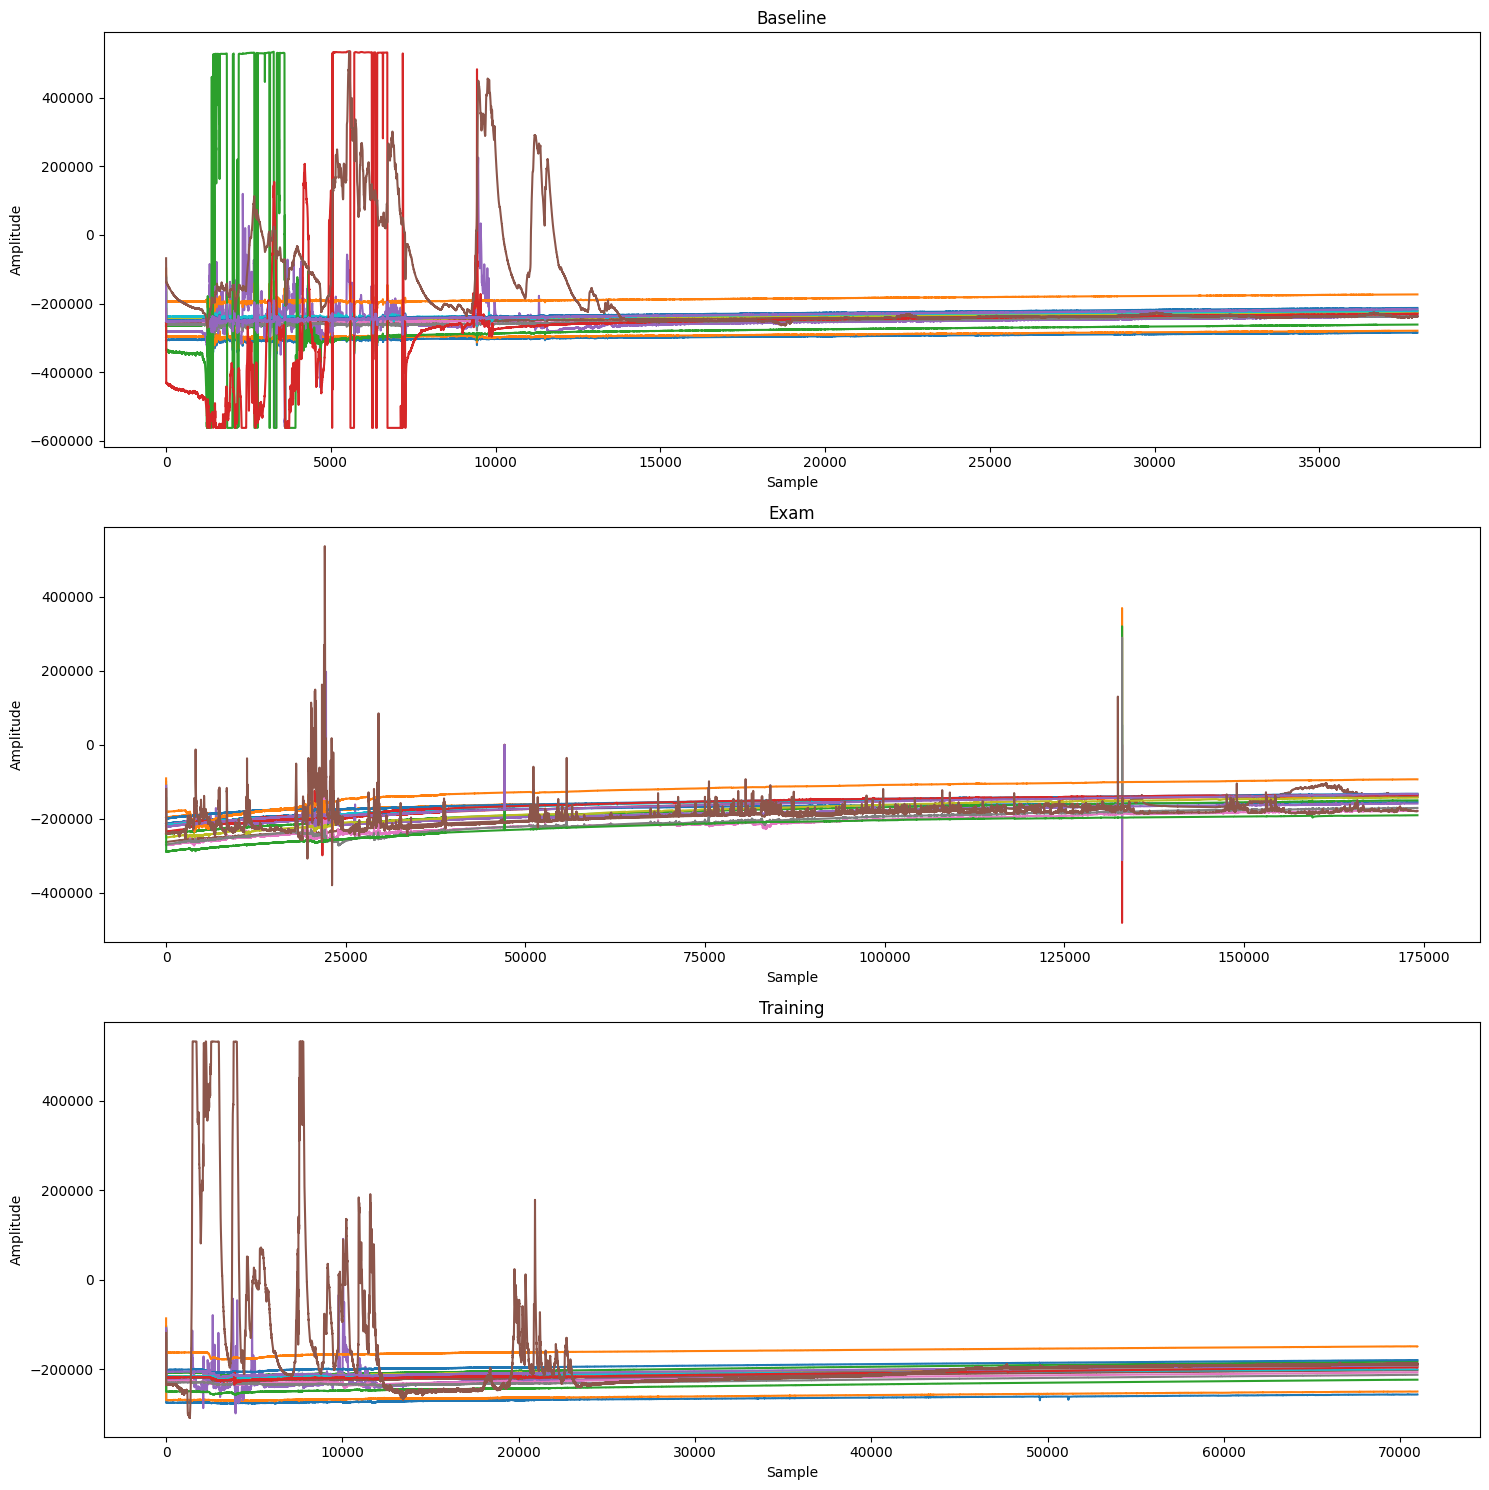

In [ ]:
# prompt: plot ['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
#        'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
#        'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
#        'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
#        'EXG Channel 15'] in df_bl, df_ex and df_tr into one plot

import matplotlib.pyplot as plt

# Extract the desired channels from each dataframe
bl_channels = df_bl[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]
ex_channels = df_ex[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]
tr_channels = df_tr[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]

# Create a figure and axes
fig, axs = plt.subplots(3, 1, figsize=(15, 15))

# Plot each channel's data on a separate subplot
for i, channel in enumerate(bl_channels):
    axs[0].plot(bl_channels[channel])
axs[0].set_title('Baseline')
axs[0].set_xlabel('Sample')
axs[0].set_ylabel('Amplitude')

for i, channel in enumerate(ex_channels):
    axs[1].plot(ex_channels[channel])
axs[1].set_title('Exam')
axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Amplitude')

for i, channel in enumerate(tr_channels):
    axs[2].plot(tr_channels[channel])
axs[2].set_title('Training')
axs[2].set_xlabel('Sample')
axs[2].set_ylabel('Amplitude')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


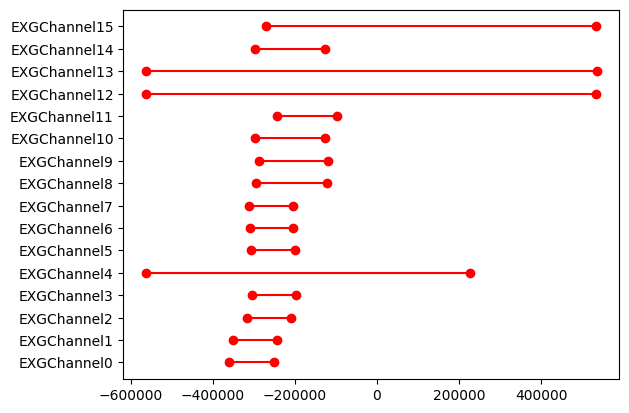

In [ ]:
# prompt: plot max and min of each value from EXGChannel0 to  EXGChannel15   in df_ml without Timestamp

import matplotlib.pyplot as plt
# Extract EXGChannel0 to EXGChannel15 data
exg_data = df_bl[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]

# Calculate the maximum and minimum for each channel
max_values = exg_data.max(axis=0)
min_values = exg_data.min(axis=0)

# Plot the maximum and minimum values for each channel
for i in range(16):
    plt.plot([max_values[i], min_values[i]], [i, i], 'ro-')

# Label the y-axis with the channel numbers
plt.yticks(range(16), ['EXGChannel0', 'EXGChannel1', 'EXGChannel2', 'EXGChannel3', 'EXGChannel4', 'EXGChannel5', 'EXGChannel6', 'EXGChannel7', 'EXGChannel8', 'EXGChannel9', 'EXGChannel10', 'EXGChannel11', 'EXGChannel12', 'EXGChannel13', 'EXGChannel14', 'EXGChannel15'])

# Show the plot
plt.show()


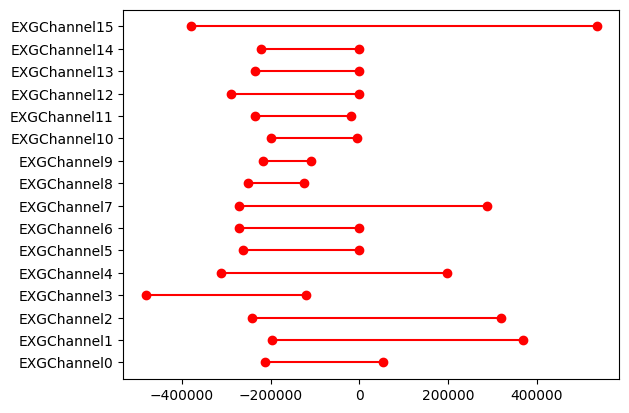

In [ ]:
# prompt: plot max and min of each value from EXGChannel0 to  EXGChannel15   in df_ml without Timestamp

import matplotlib.pyplot as plt
# Extract EXGChannel0 to EXGChannel15 data
exg_data = df_ex[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]

# Calculate the maximum and minimum for each channel
max_values = exg_data.max(axis=0)
min_values = exg_data.min(axis=0)

# Plot the maximum and minimum values for each channel
for i in range(16):
    plt.plot([max_values[i], min_values[i]], [i, i], 'ro-')

# Label the y-axis with the channel numbers
plt.yticks(range(16), ['EXGChannel0', 'EXGChannel1', 'EXGChannel2', 'EXGChannel3', 'EXGChannel4', 'EXGChannel5', 'EXGChannel6', 'EXGChannel7', 'EXGChannel8', 'EXGChannel9', 'EXGChannel10', 'EXGChannel11', 'EXGChannel12', 'EXGChannel13', 'EXGChannel14', 'EXGChannel15'])

# Show the plot
plt.show()


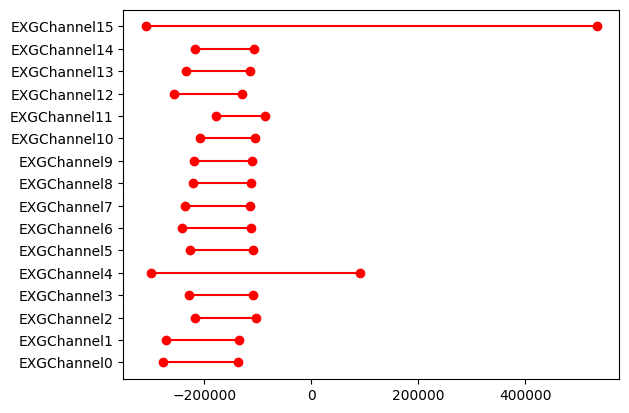

In [ ]:
# prompt: plot max and min of each value from EXGChannel0 to  EXGChannel15   in df_ml without Timestamp

import matplotlib.pyplot as plt
# Extract EXGChannel0 to EXGChannel15 data
exg_data = df_tr[['EXG Channel 0', 'EXG Channel 1', 'EXG Channel 2',
       'EXG Channel 3', 'EXG Channel 4', 'EXG Channel 5', 'EXG Channel 6',
       'EXG Channel 7', 'EXG Channel 8', 'EXG Channel 9', 'EXG Channel 10',
       'EXG Channel 11', 'EXG Channel 12', 'EXG Channel 13', 'EXG Channel 14',
       'EXG Channel 15']]

# Calculate the maximum and minimum for each channel
max_values = exg_data.max(axis=0)
min_values = exg_data.min(axis=0)

# Plot the maximum and minimum values for each channel
for i in range(16):
    plt.plot([max_values[i], min_values[i]], [i, i], 'ro-')

# Label the y-axis with the channel numbers
plt.yticks(range(16), ['EXGChannel0', 'EXGChannel1', 'EXGChannel2', 'EXGChannel3', 'EXGChannel4', 'EXGChannel5', 'EXGChannel6', 'EXGChannel7', 'EXGChannel8', 'EXGChannel9', 'EXGChannel10', 'EXGChannel11', 'EXGChannel12', 'EXGChannel13', 'EXGChannel14', 'EXGChannel15'])

# Show the plot
plt.show()


In [ ]:
import os
import pandas as pd
def read_csv_files(path):
  """
  Reads all csv files under a given path.

  Args:
    path: The path to the directory containing the csv files.

  Returns:
    A list of strings, where each string is the content of a csv file.
  """

  csv_files = []
  for filename in os.listdir(path):
    if filename.endswith('.txt'):
        csv_files.append(os.path.join(path, filename))

  return csv_files
for name in ['Baseline', 'Exam', 'Training']:
  for i in range(1, 39):
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      txt_files = read_csv_files(path)
      # Print the content of each txt file
      for filename in txt_files:
        # Read data from line 5
        data = pd.read_table(filename, skiprows=4, sep=',', header=None)
        new_filename = filename[:-4] + '.csv'

        data.columns = data.iloc[0]
        data = data.iloc[1:]

        data.to_csv(new_filename, index=False)
    except FileNotFoundError:
      pass
    except pd.errors.EmptyDataError:
      pass


In [ ]:
# prompt: read /content/drive/MyDrive/MX_Project_Data/Subject_1/OpenBCISession_Subject_1_Baseline/OpenBCI-RAW-2024-05-06_14-54-56.csv

import pandas as pd
df_py = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_34/Baseline/OpenBCI-RAW-2024-04-24_13-58-25.csv')


In [ ]:
df_py

,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,EXG Channel 8,...,Other.3,Other.4,Other.5,Other.6,Analog Channel 0,Analog Channel 1,Analog Channel 2,Timestamp,Other.7,Timestamp (Formatted)
0,0.0,-310376.077637,414825.131276,415384.304867,415319.864788,-440850.742561,415302.564538,415139.150934,-189851.135296,207616.346492,...,7.0,104.0,127.0,64.0,0.0,0.0,0.0,1.713985e+09,0.0,2024-04-24 13:58:25.159
1,2.0,-273359.845383,414094.564509,414641.668158,414577.026913,-378417.693486,414574.612924,414367.747529,-362573.413560,414616.254224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713985e+09,0.0,2024-04-24 13:58:25.167
2,4.0,-320027.739707,414731.253950,415292.707419,415227.663842,-462423.752239,415206.876720,415023.078325,396006.214143,414862.346931,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713985e+09,0.0,2024-04-24 13:58:25.174
3,6.0,-249990.493058,413181.339286,413721.268025,413656.760890,-318038.613264,413666.752120,413451.705986,413509.976984,414199.707115,...,10.5,96.0,126.5,112.0,0.0,0.0,0.0,1.713985e+09,0.0,2024-04-24 13:58:25.183
4,8.0,-260573.284098,413282.726798,413825.874189,413761.434109,-304785.012279,413773.839328,413561.408348,210812.131859,413313.572206,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713985e+09,0.0,2024-04-24 13:58:25.190
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52296,144.0,-278453.562075,-267869.564041,-203317.971923,491824.052253,94424.028030,-234816.832521,-230398.563194,-234710.348810,-227646.079975,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713986e+09,0.0,2024-04-24 14:05:22.842
52297,146.0,-278545.427745,-267959.485109,-203402.528572,492325.088957,91549.906617,-234945.109182,-230510.210158,-234819.984117,-227682.759188,...,13.5,80.0,125.5,0.0,0.0,0.0,0.0,1.713986e+09,0.0,2024-04-24 14:05:22.849
52298,148.0,-278483.871041,-267909.596015,-203374.767706,491842.693608,88110.375477,-234877.584562,-230470.446404,-234757.756860,-227699.254775,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713986e+09,0.0,2024-04-24 14:05:22.856
52299,150.0,-278539.258664,-267966.592964,-203423.047474,491810.574151,85539.947217,-234961.671825,-230549.571580,-234831.316451,-227695.969069,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.713986e+09,0.0,2024-04-24 14:05:22.864


In [ ]:
df_py_new.shape

(37975, 33)

In [ ]:
df_py_old.head()

In [ ]:
df_py_new.head()

In [7]:
i

2

In [8]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
def read_txt_files(path):
  """
  Reads all txt files under a given path.

  Args:
    path: The path to the directory containing the txt files.

  Returns:
    A list of strings, where each string is the content of a txt file.
  """

  txt_files = []
  for filename in os.listdir(path):
    if filename.endswith('.csv'):
        txt_files.append(os.path.join(path, filename))

  return txt_files
for name in ['Baseline', 'Exam', 'Training']:
  for i in range(2, 39):
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      txt_files = read_txt_files(path)
      # Print the content of each txt file
      for filename in txt_files:
        # Read data from line 5
        data = pd.read_csv(filename)
        # Trim column names
        data.columns = data.columns.str.strip()
        # Remove columns with names containing "Other"
        data = data.loc[:, ~data.columns.str.contains('Other')]
        data.to_csv(filename, index=False)
    except FileNotFoundError:
      pass
    except pd.errors.EmptyDataError:
      pass

In [15]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
def read_txt_files(path):
  """
  Reads all txt files under a given path.

  Args:
    path: The path to the directory containing the txt files.

  Returns:
    A list of strings, where each string is the content of a txt file.
  """

  txt_files = []
  for filename in os.listdir(path):
    if filename.endswith('.txt'):
        txt_files.append(os.path.join(path, filename))

  return txt_files
for name in ['Baseline', 'Exam', 'Training']:
  for i in range(1, 39):
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      txt_files = read_txt_files(path)
      # Print the content of each txt file
      for filename in txt_files:
        # Delete the txt file
        os.remove(filename)
    except FileNotFoundError:
      pass
    except pd.errors.EmptyDataError:
      pass


In [ ]:
# prompt: read /content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Baseline/OpenBCI-RAW-2024-03-19_16-14-33_new.csv to dataframe

import pandas as pd
df_py_Baseline = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Baseline/OpenBCI-RAW-2024-03-19_16-14-33.csv')
df_py_Exam = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Exam/OpenBCI-RAW-2024-03-20_16-29-14_new.csv')
df_py_Training_1 = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Training/OpenBCI-RAW-2024-03-19_16-20-31_new.csv')
df_py_Training_2 = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Training/OpenBCI-RAW-2024-03-19_16-20-57_new.csv')
df_py_Training_3 = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Training/OpenBCI-RAW-2024-03-19_16-21-15_new.csv')
df_py_Training_4 = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_9/OpenBCISession_Subject_9_Training/OpenBCI-RAW-2024-03-19_16-22-30_new.csv')


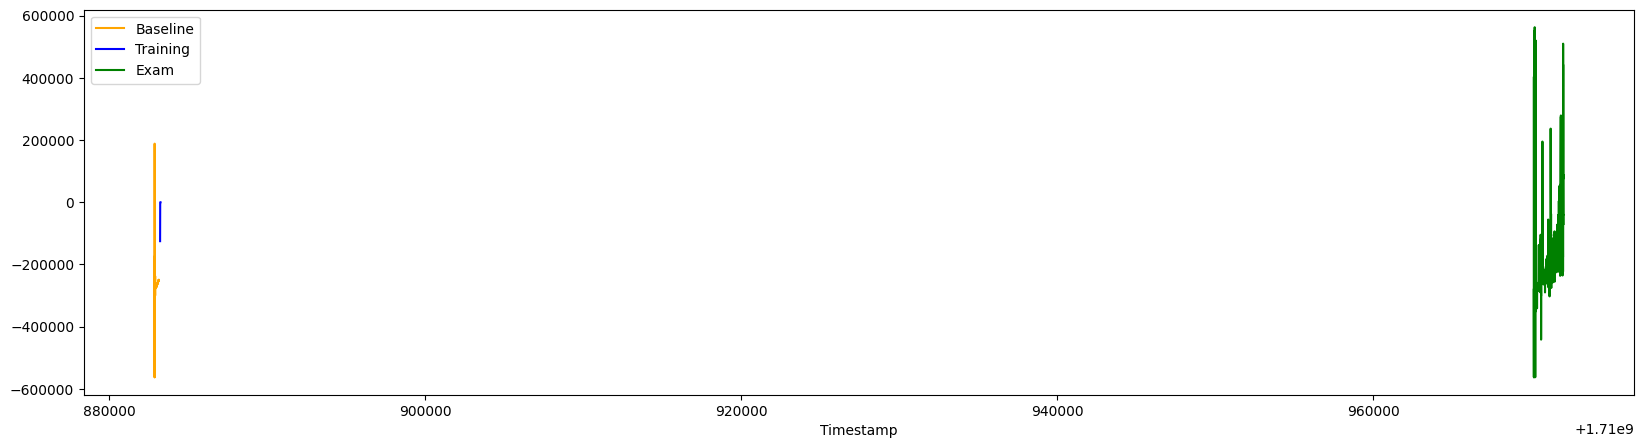

In [ ]:
import matplotlib.pyplot as plt
# Set the plot size
plt.figure(figsize=(20, 5))
i = 14

df_lst = [df_py_Baseline, df_py_Training_1, df_py_Exam]
color_lst = ['orange', 'blue', 'green']
label_lst = ['Baseline', 'Training', 'Exam']

# Plot EXGChannel0 to EXGChannel15 for each dataframe
for j in range(len(df_lst)):
  # for df in [df_py_Baseline, df_py_Exam, df_py_Training_1, df_py_Training_2, df_py_Training_3, df_py_Training_4]:
  df = df_lst[j]

  # Assuming the first column in your dataframe is the index or a suitable time-based column
  # x_values = df.iloc[:, 0]  # Access the first column (index 0) for x-axis
  plt.plot(df[' Timestamp'], df[f' EXG Channel {i}'], color=color_lst[j], label=label_lst[j])

# Label the x-axis
plt.xlabel('Timestamp') # Update the label if necessary
plt.legend(loc="upper left")

# Show the plot
plt.show()

In [23]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
def read_txt_files(path):
  """
  Reads all txt files under a given path.

  Args:
    path: The path to the directory containing the txt files.

  Returns:
    A list of strings, where each string is the content of a txt file.
  """

  txt_files = []
  for filename in os.listdir(path):
    if filename.endswith('.csv'):
        txt_files.append(os.path.join(path, filename))

  return txt_files
for name in ['Baseline', 'Exam', 'Training']:
  for i in range(3, 39): # 39
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      txt_files = read_txt_files(path)
      # Print the content of each txt file
      for filename in txt_files:
        old_filename = filename
        # Delete the txt file
        new_filename = f"Subject_{i}_EEG_{name}_" + old_filename.split("/")[-1]
        # Rename the file
        # Build the path to the new file
        new_file_path = os.path.join(f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}', new_filename)
        os.rename(old_filename, new_file_path)

    except FileNotFoundError:
      pass
    except pd.errors.EmptyDataError:
      pass

In [24]:
# prompt: delete folder f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'

import os

for i in range(1, 39):
  for name in ['Baseline', 'Exam', 'Training']:
    try:
      path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/{name}'
      os.rmdir(path)
    except FileNotFoundError:
      pass


In [43]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
def read_txt_files(path):
  """
  Reads all txt files under a given path.

  Args:
    path: The path to the directory containing the txt files.

  Returns:
    A list of strings, where each string is the content of a txt file.
  """

  txt_files = []
  for filename in os.listdir(path):
    if filename.endswith('.csv'):
        txt_files.append(os.path.join(path, filename))

  return txt_files
for i in range(2, 39): # 39
  try:
    path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/'
    txt_files = read_txt_files(path)
    # Print the content of each txt file
    for filename in txt_files:
      df = pd.read_csv(filename)
      df.drop(['Analog Channel 0', 'Analog Channel 1', 'Analog Channel 2'], axis=1, inplace=True)
      df['Subject'] = i
      df.to_csv(filename, index=False)

  except FileNotFoundError:
    pass
  except KeyError:
    pass


In [44]:
# prompt: read /content/drive/MyDrive/MX_Project_Data/Subject_14/Subject_14_EEG_Exam_OpenBCI-RAW-2024-03-14_15-29-53.csv

import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/MX_Project_Data/Subject_14/Subject_14_EEG_Exam_OpenBCI-RAW-2024-03-14_15-29-53.csv')

df.head()


,Sample Index,EXG Channel 0,EXG Channel 1,EXG Channel 2,EXG Channel 3,EXG Channel 4,EXG Channel 5,EXG Channel 6,EXG Channel 7,EXG Channel 8,...,EXG Channel 12,EXG Channel 13,EXG Channel 14,EXG Channel 15,Accel Channel 0,Accel Channel 1,Accel Channel 2,Timestamp,Timestamp (Formatted),Subject
0,0.0,-284813.750960,-264128.150240,-200160.139818,-217777.762446,-224710.804190,-218333.046834,-213116.417899,-221147.489088,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,1.710448e+09,2024-03-14 15:29:53.994,14
1,160.0,-284369.107708,-264022.605303,-199697.056377,-217502.500713,-224091.817330,-217907.648433,-212562.675782,-219953.369493,-232901.064503,...,-248295.068538,-221355.092091,-197512.799205,-200340.786617,0.0,0.0,0.0,1.710448e+09,2024-03-14 15:29:53.994,14
2,160.0,-284320.760884,-263995.783209,-199659.237225,-217513.631882,-224087.190519,-217855.948848,-212521.034482,-219941.701882,-232901.064503,...,-248295.068538,-221355.092091,-197512.799205,-200340.786617,0.0,0.0,0.0,1.710448e+09,2024-03-14 15:29:53.994,14
3,126.0,-283863.578303,-263535.046701,-198976.212618,-216040.495460,-221636.589961,-214833.367149,-211727.435795,-214457.455511,-232515.698077,...,-247966.699060,-220448.505336,-196888.917314,-198819.370427,0.0,0.0,0.0,1.710448e+09,2024-03-14 15:29:53.994,14
4,126.0,-283850.234312,-263513.991358,-198923.641315,-216562.185176,-221636.053519,-217279.944394,-211589.436124,-217327.687720,-232515.698077,...,-247966.699060,-220448.505336,-196888.917314,-198819.370427,0.0,0.0,0.0,1.710448e+09,2024-03-14 15:29:53.994,14


In [ ]:
# prompt: read all txt files under '/content/drive/MyDrive/MX_Project_Data/Subject_1/

import os
import pandas as pd
for i in range(2, 39): # 39
  try:
    path = f'/content/drive/MyDrive/MX_Project_Data/Subject_{i}/'
    for filename in os.listdir(path):
      print(filename)
      if "BrainFlow-RAW" in filename:
          os.remove(os.path.join(path, filename))
  except FileNotFoundError:
    pass
  except pd.errors.EmptyDataError:
    pass